# <center><u><b>RETAIL ANALYTICS VISUAL REPORT</b></u></center>

# CONNECTING THE DATABASE

In [6]:
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


conn = mysql.connector.connect(
    host="localhost",              
    user="root",                   
    password="Souvik@2002",     
    database="RETAIL_ANALYTICS"   
)

# Running Procedure 1: PROC_TOP_SELLING_PRODUCTS

In [8]:
cursor=conn.cursor();
cursor.callproc("PROC_TOP_SELLING_PRODUCTS")
for result in cursor.stored_results():
    df=pd.DataFrame(result.fetchall(),columns=[
        'PRODUCT_ID', 'PRODUCT_NAME', 'TOTAL_QUANTITY_SOLD', 'TOTAL_REVENUE'
    ]);
print("The Top 10 selling products of the database is:");
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
print(df);

The Top 10 selling products of the database is:
   PRODUCT_ID          PRODUCT_NAME TOTAL_QUANTITY_SOLD TOTAL_REVENUE
0         109    HP Pavilion Laptop                  11     626989.00
1         119          OnePlus Nord                  15     419985.00
2         111  Samsung Refrigerator                   8     343992.00
3         103           MacBook Air                   3     299997.00
4         102            Galaxy S22                   2     125998.00
5         117        Apple Watch SE                   4     115996.00
6         110         Apple AirPods                   8     111992.00
7         120         Redmi Note 12                   5      94995.00
8         116          TCL Smart TV                   3      80997.00
9         101             iPhone 14                   1      69999.00


# BAR PLOT FOR THE TOP 10 BEST SELLING PRODUCTS

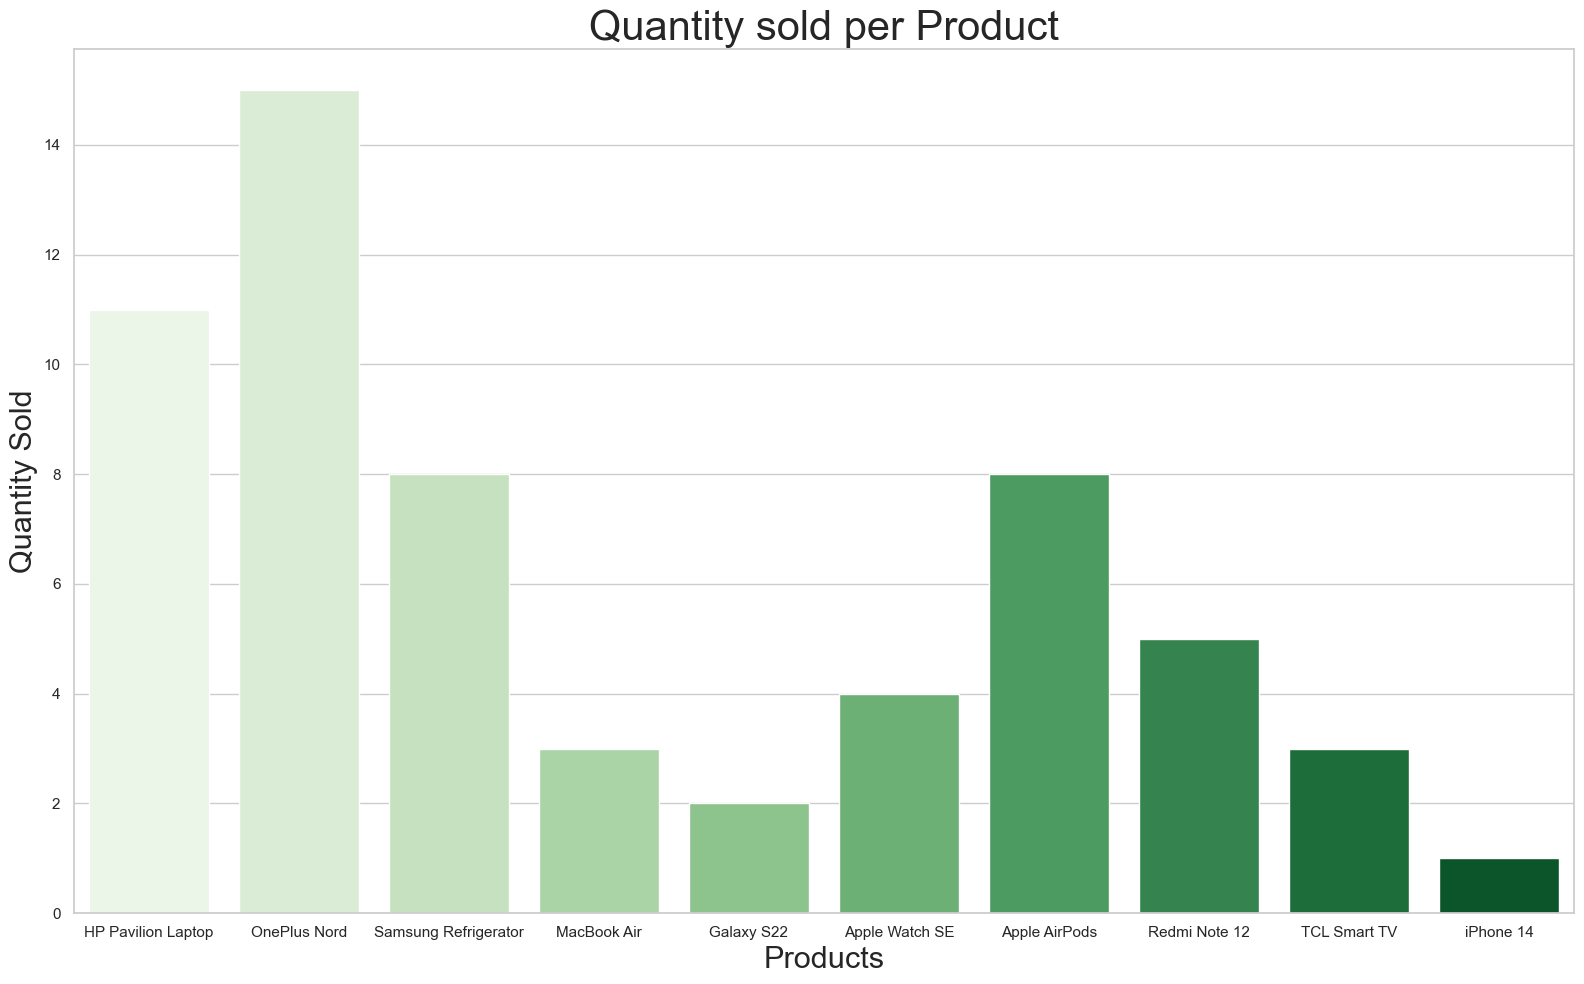

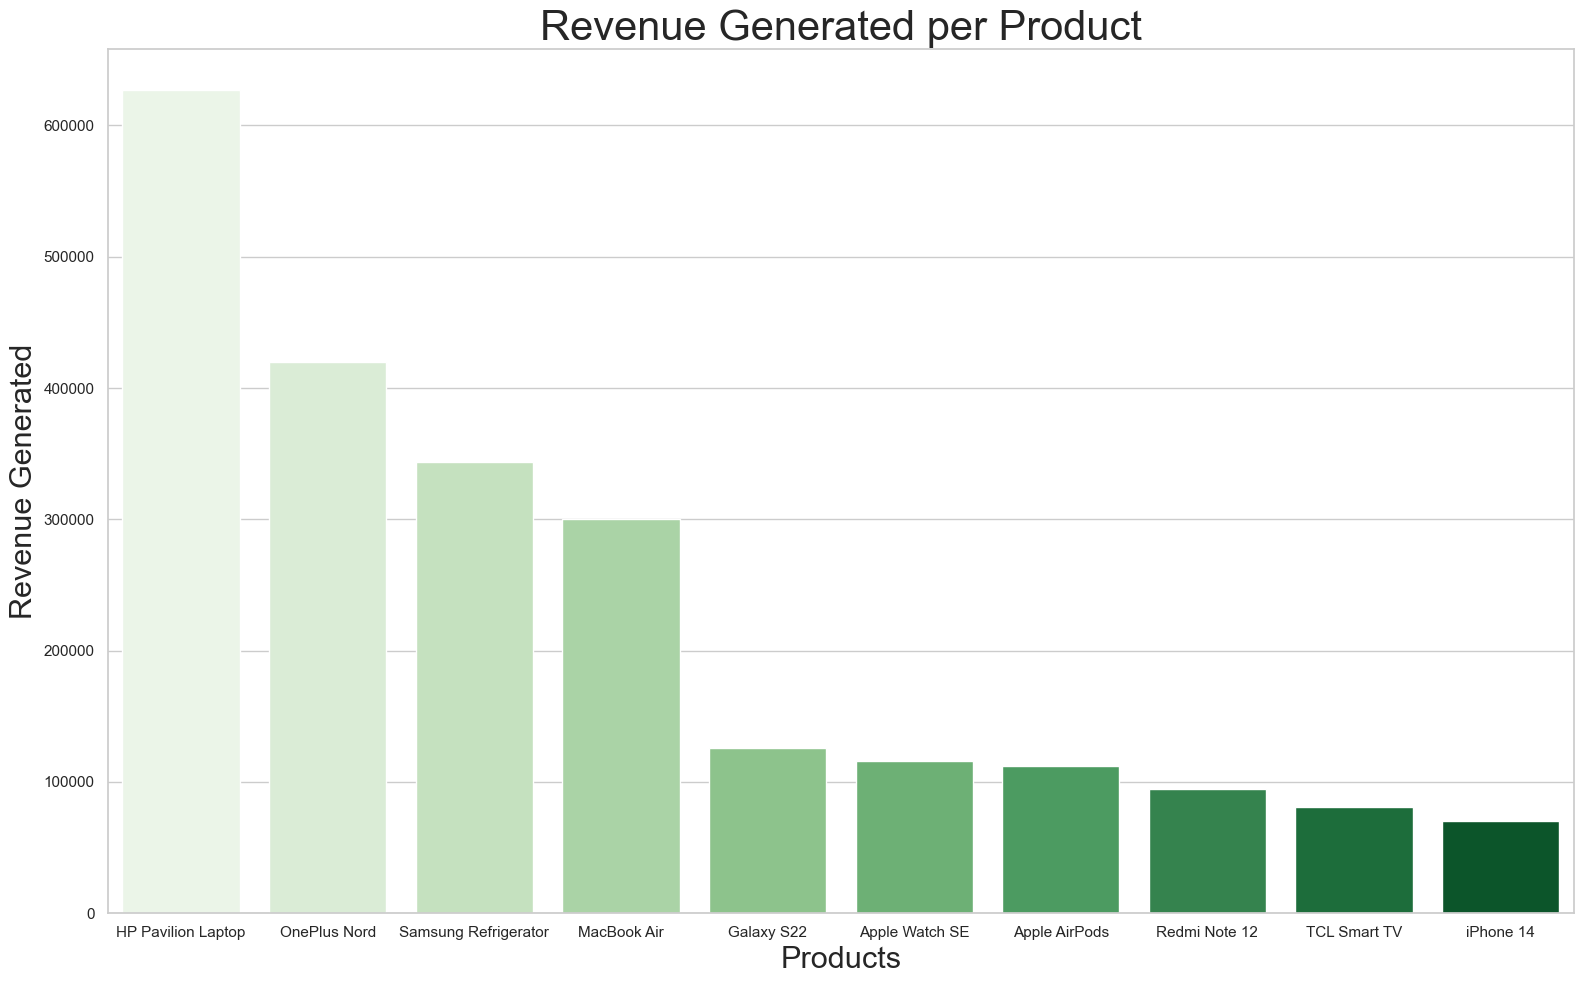

In [10]:
plt.figure(figsize=(16,10))
sns.set_theme(style="whitegrid",context="notebook")
sns.barplot(x="PRODUCT_NAME",y="TOTAL_QUANTITY_SOLD",hue="PRODUCT_NAME",data=df,palette="Greens")
plt.title("Quantity sold per Product",fontsize=30)
plt.xlabel("Products",fontsize=22)
plt.ylabel("Quantity Sold",fontsize=22)
plt.tight_layout()
plt.show()

print(" ");
print(" ");
print(" ");

plt.figure(figsize=(16,10))
sns.set_theme(style="whitegrid",context="notebook")
sns.barplot(x="PRODUCT_NAME",y="TOTAL_REVENUE",hue="PRODUCT_NAME",data=df,palette="Greens")
plt.title("Revenue Generated per Product",fontsize=30)
plt.xlabel("Products",fontsize=22)
plt.ylabel("Revenue Generated",fontsize=22)
plt.tight_layout()
plt.show()

# RUNNING PROCEDURE 2: PROC_CUSTOMER_PURCHASE_HISTORY

In [12]:
customer_id=13
cursor.callproc("PROC_CUSTOMER_PURCHASE_HISTORY",[customer_id])
for result in cursor.stored_results():
    df_history=pd.DataFrame(result.fetchall(),columns=[
         'DATE', 'PRODUCT_NAME', 'STORE_NAME', 'QUANTITY', 'TOTAL_AMOUNT', 'PAYMENT_METHOD'
    ])
print("The Purchase History of customer ",customer_id," is :")

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

print(df_history)

The Purchase History of customer  13  is :
         DATE          PRODUCT_NAME            STORE_NAME  QUANTITY TOTAL_AMOUNT PAYMENT_METHOD
0  2025-06-01          OnePlus Nord    Star Bazaar - Pune         3     83997.00           Cash
1  2025-06-15  Samsung Refrigerator    D-Mart - Bangalore         2     85998.00     Debit Card
2  2025-06-09    HP Pavilion Laptop  More Retail - Jaipur         2    113998.00           Cash
3  2025-06-03       Sony Headphones    D-Mart - Bangalore         3     20997.00  Mobile Wallet
4  2025-06-16  Samsung Refrigerator  Big Bazaar - Kolkata         1     42999.00     Debit Card
5  2025-06-10     Zara Casual Shirt   Spencer's - Chennai         2      3598.00  Mobile Wallet


# RUNNING PROCEDURE 3: PROC_TOP_SPENDING_CUSTOMER

In [15]:
cursor.callproc("PROC_TOP_SPENDING_CUSTOMER")
for result in cursor.stored_results():
    df_spend=pd.DataFrame(result.fetchall(),columns=[
        "CUSTOMER_ID","CUSTOMER_NAME","TOTAL_UNITS_PURCHASED","TOTAL_SPENT"
    ])
print("The top spending customers are:")

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

print(df_spend)

The top spending customers are:
   CUSTOMER_ID CUSTOMER_NAME  TOTAL_UNITS_PURCHASED TOTAL_SPENT
0           16   Sana Sheikh                      6   392088.00
1           13  Deepak Yadav                      6   351587.00
2           15    Arjun Nair                      3   250994.00
3           17  Raj Malhotra                      4   234493.00
4            2     Priya Das                      4   174994.00
5            3    Amit Verma                      4   162193.00
6            8   Neha Sharma                      5   152490.00
7            4     Sneha Roy                      3   141294.00
8           10   Isha Kapoor                      5   127189.00
9           18    Divya Iyer                      4   124792.00


# BAR PLOT FOR TOP 10 HIGHEST SPENDING CUSTOMERS

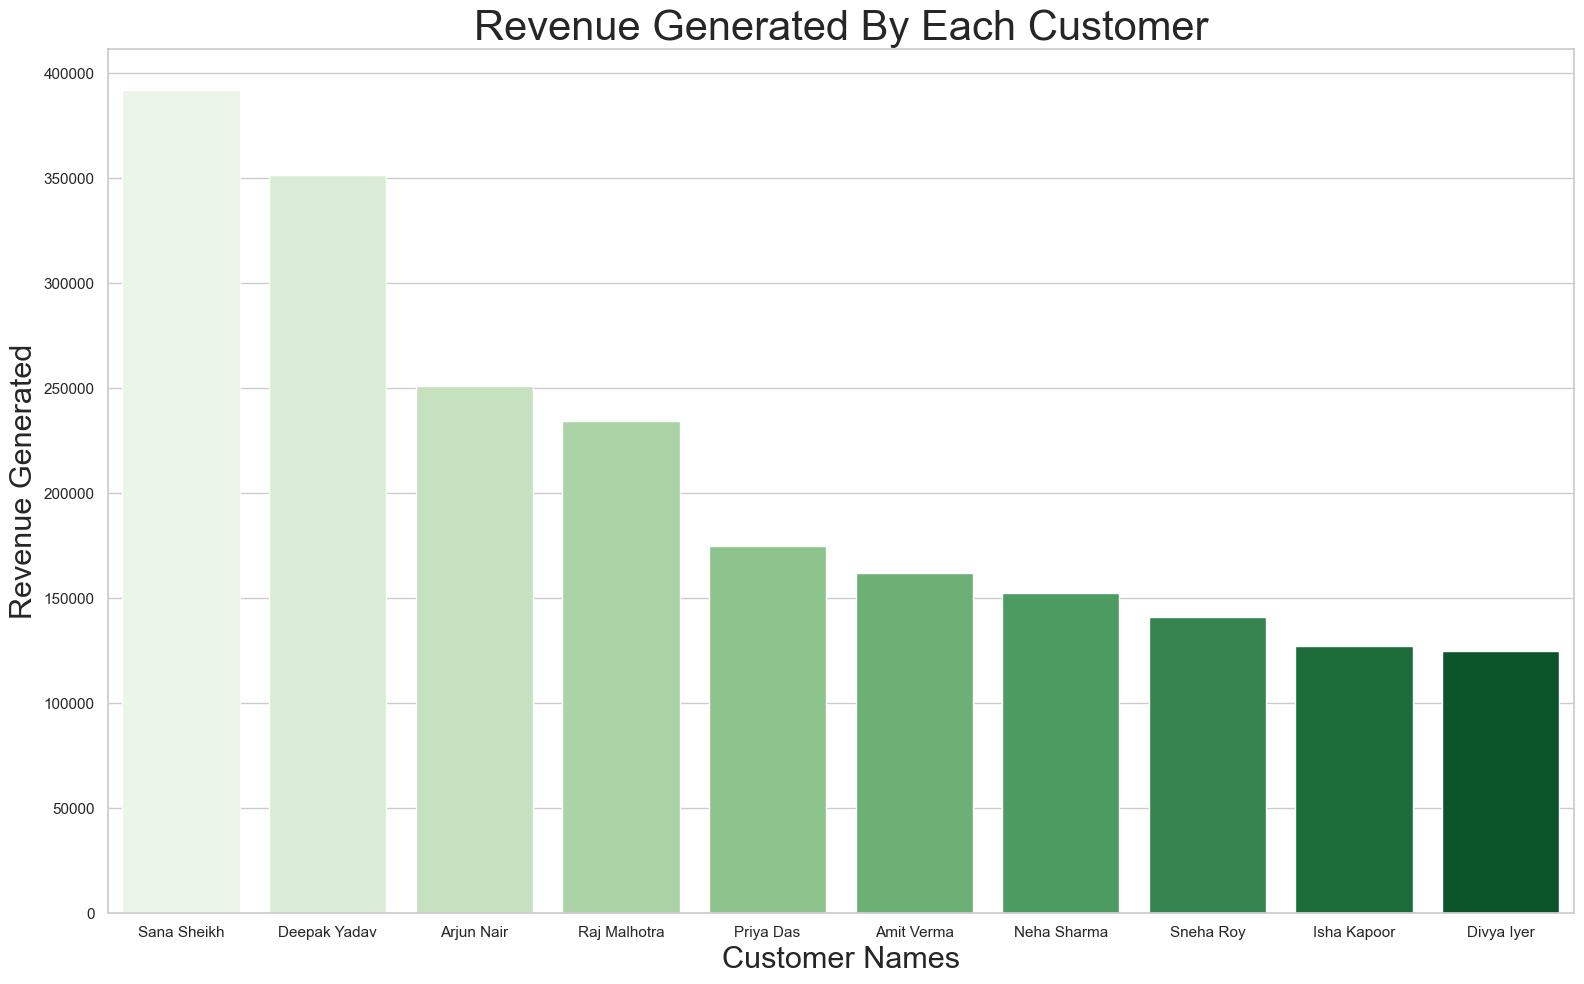

In [18]:
plt.figure(figsize=(16,10))
sns.set_theme(style="whitegrid",context="notebook")
sns.barplot(x="CUSTOMER_NAME",y="TOTAL_SPENT",hue="CUSTOMER_NAME",data=df_spend,palette="Greens")
plt.title("Revenue Generated By Each Customer",fontsize=30)
plt.xlabel("Customer Names",fontsize=22)
plt.ylabel("Revenue Generated",fontsize=22)
plt.tight_layout()
plt.show()

# RUNNING PROCEDURE 4:PROC_SALES_BY_REGION

In [23]:
cursor.callproc("PROC_SALES_BY_REGION")
for result in cursor.stored_results():
    df_region=pd.DataFrame(result.fetchall(),columns=[
        "REGION","TOTAL_TRANSACTION","TOTAL_SALES"
    ])
print("The region wise sale report is:")
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
print(df_region)

The region wise sale report is:
  REGION  TOTAL_TRANSACTION TOTAL_SALES
0  North                 10   370084.00
1   East                 12   541474.00
2   West                 13   774473.00
3  South                 25   935049.00


# BAR PLOT FOR REGION WISE TRANSACTION AND TOTAL SALES

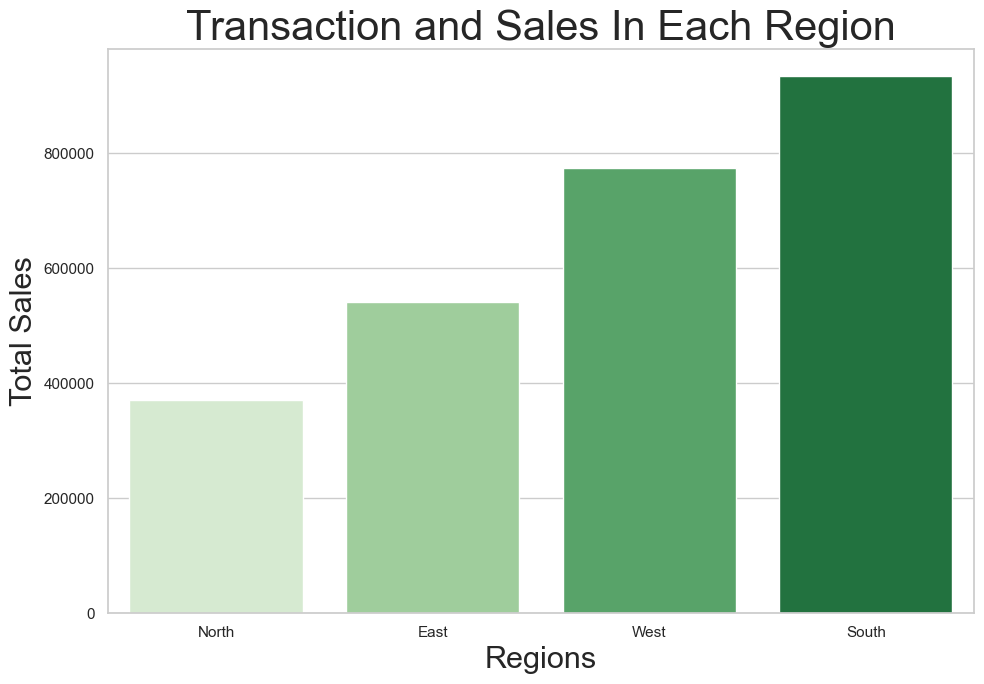

In [27]:
plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid",context="notebook")
sns.barplot(x="REGION",y="TOTAL_SALES",hue="REGION",data=df_region,palette="Greens")
plt.title("Transaction and Sales In Each Region",fontsize=30)
plt.xlabel("Regions",fontsize=22)
plt.ylabel("Total Sales",fontsize=22)
plt.tight_layout()
plt.show()

# RUNNING PROCEDURE 5:PROC_CATEGORY_REVENUE_BREAKDOWN

In [30]:
cursor.callproc("PROC_CATEGORY_REVENUE_BREAKDOWN")
for result in cursor.stored_results():
    df_category=pd.DataFrame(result.fetchall(),columns=[
        "PRODUCT_CATEGORY","UNITS_SOLD","TOTAL_REVENUE"
    ])
print("The Category wise revenue breakdown is:")
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
print(df_category)

The Category wise revenue breakdown is:
  PRODUCT_CATEGORY UNITS_SOLD TOTAL_REVENUE
0      Electronics         62    2051938.00
1       Appliances         19     428481.00
2         Footwear         19      95481.00
3         Clothing         20      45180.00


# BAR PLOT FOR PRODUCT CATEGORY WISE TOTAL REVENUE GENERATED

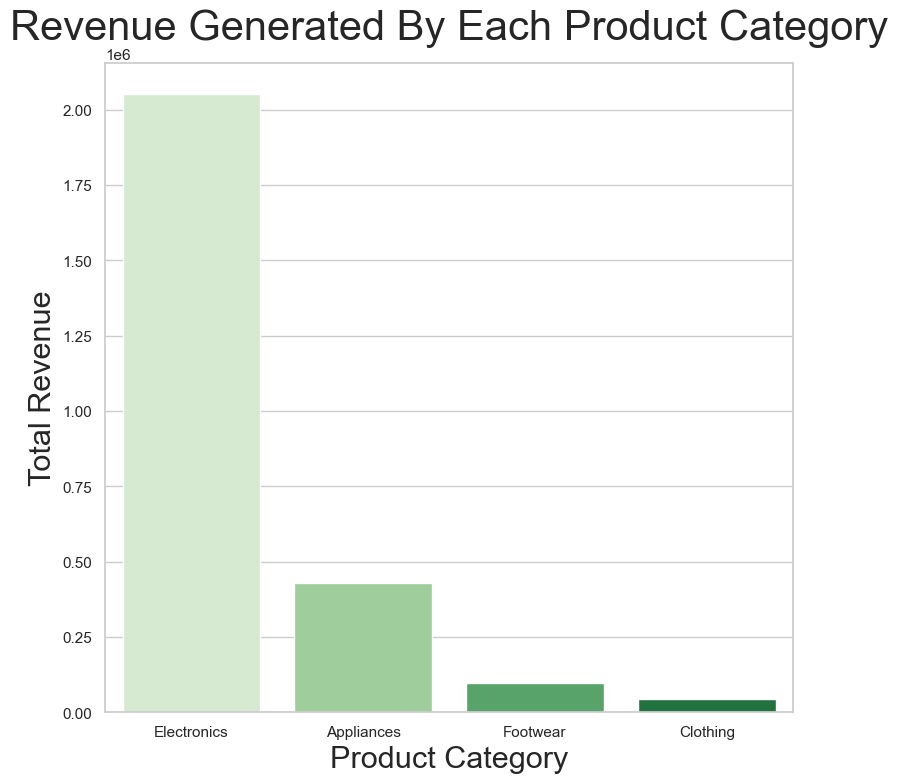

In [33]:
plt.figure(figsize=(8,8))
sns.set_theme(style="whitegrid",context="notebook")
sns.barplot(x="PRODUCT_CATEGORY",y="TOTAL_REVENUE",hue="PRODUCT_CATEGORY",data=df_category,palette="Greens")
plt.title("Revenue Generated By Each Product Category",fontsize=30)
plt.xlabel("Product Category",fontsize=22)
plt.ylabel("Total Revenue",fontsize=22)
plt.tight_layout()
plt.show()


# RUNNING PROCEDURE 6:PROC_DAILY_SALES_TREND

In [36]:
cursor.callproc("PROC_DAILY_SALES_TREND")
for result in cursor.stored_results():
    df_trend=pd.DataFrame(result.fetchall(),columns=[
        "DATE_ID","DAILY_REVENUE","RUNNING_TOTAL"
    ])
print("DAILY SALES TREND IS:")
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
print(df_trend)

DAILY SALES TREND IS:
       DATE_ID DAILY_REVENUE RUNNING_TOTAL
0   2025-06-01     194994.00     194994.00
1   2025-06-02     191493.00     386487.00
2   2025-06-03      34996.00     421483.00
3   2025-06-04     164890.00     586373.00
4   2025-06-05      38496.00     624869.00
5   2025-06-06      92294.00     717163.00
6   2025-06-07      88296.00     805459.00
7   2025-06-08     104996.00     910455.00
8   2025-06-09     184193.00    1094648.00
9   2025-06-10     147590.00    1242238.00
10  2025-06-11     139494.00    1381732.00
11  2025-06-12     214992.00    1596724.00
12  2025-06-14      73998.00    1670722.00
13  2025-06-15     379883.00    2050605.00
14  2025-06-16      48097.00    2098702.00
15  2025-06-18     141996.00    2240698.00
16  2025-06-19     180894.00    2421592.00
17  2025-06-20     199488.00    2621080.00


# LINE PLOT FOR REVENUE AND IT'S RUNNING TOTAL AT A DAILY BASIS

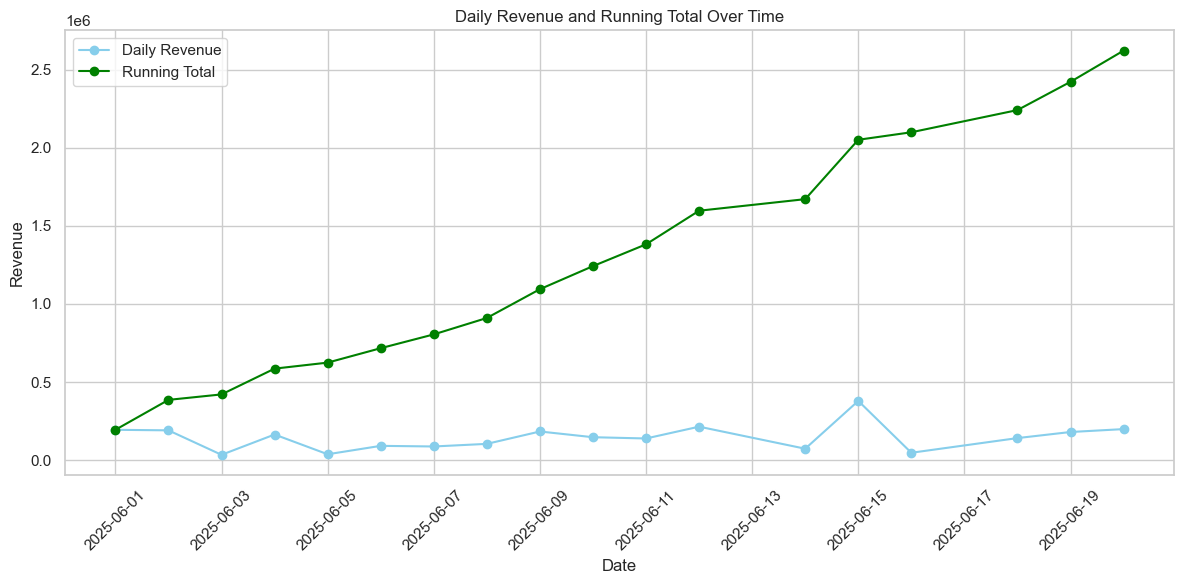

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(df_trend['DATE_ID'], df_trend['DAILY_REVENUE'], marker='o', label='Daily Revenue', color='skyblue')
plt.plot(df_trend['DATE_ID'], df_trend['RUNNING_TOTAL'], marker='o', label='Running Total', color='green')
plt.title('Daily Revenue and Running Total Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# RUNNING PROCEDURE 7:PROC_WEEKLY_SALES_SUMMARY

In [42]:
cursor.callproc("PROC_WEEKLY_SALES_SUMMARY")
for result in cursor.stored_results():
    df_weekly=pd.DataFrame(result.fetchall(),columns=[
        "YEAR","WEEK","TOTAL_TRANSACTIONS","TOTAL_REVENUE","AVERAGE_REVENUE"
    ])
print("The weekly sales summary is:")
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
print(df_weekly)

The weekly sales summary is:
   YEAR  WEEK  TOTAL_TRANSACTIONS TOTAL_REVENUE AVERAGE_REVENUE
0  2025    22                  20     805459.00    40272.950000
1  2025    24                  20     950358.00    47517.900000
2  2025    23                  20     865263.00    43263.150000


# BAR PLOT FOR THE TOTAL_REVENUE AND LINE PLOT FOR AVERAGE AT A WEEK BASIS

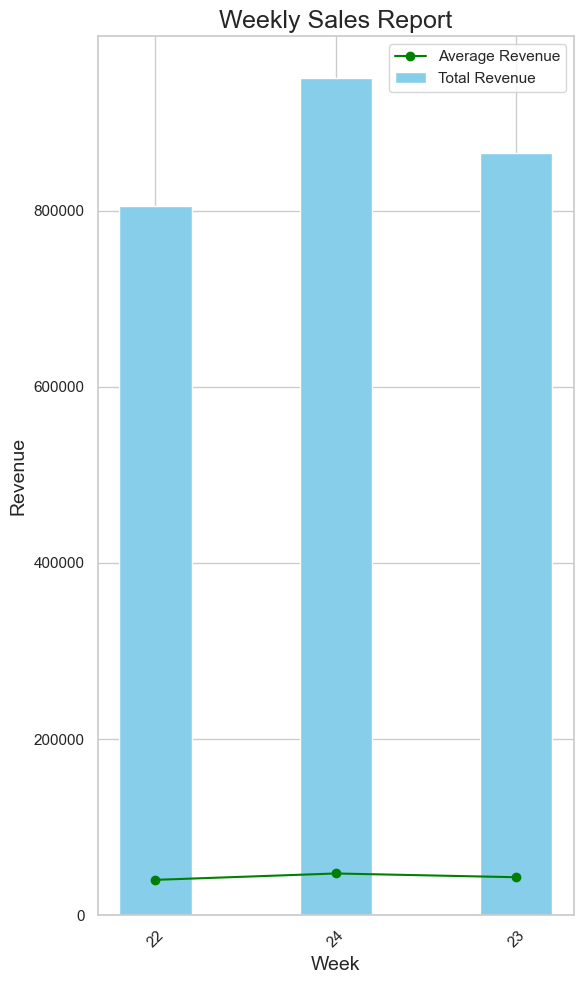

In [53]:

x = np.arange(len(df_weekly)) 
plt.figure(figsize=(6, 10))
plt.bar(x, df_weekly['TOTAL_REVENUE'], width=0.4, label='Total Revenue', color='skyblue')
plt.plot(x, df_weekly['AVERAGE_REVENUE'], color='green', marker='o', label='Average Revenue')
plt.xticks(x, df_weekly['WEEK'], rotation=45)
plt.xlabel("Week", fontsize=14)
plt.ylabel("Revenue", fontsize=14)
plt.title("Weekly Sales Report", fontsize=18)
plt.legend()
plt.tight_layout()
plt.show()


# RUNNING PROCEDURE 8: PROC_PRODUCT_RANKING_BY_REVENUE

In [56]:
cursor.callproc("PROC_PRODUCT_RANKING_BY_REVENUE")
for result in cursor.stored_results():
    df_rank=pd.DataFrame(result.fetchall(),columns=[
        "PRODUCT_ID","PRPDUCT_NAME","TOTAL_REVENUE","RANK"
    ])
print("The rank of the products as per revenue generation is:")
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
print(df_rank)

The rank of the products as per revenue generation is:
    PRODUCT_ID          PRPDUCT_NAME TOTAL_REVENUE  RANK
0          109    HP Pavilion Laptop     626989.00     1
1          119          OnePlus Nord     419985.00     2
2          111  Samsung Refrigerator     343992.00     3
3          103           MacBook Air     299997.00     4
4          102            Galaxy S22     125998.00     5
5          117        Apple Watch SE     115996.00     6
6          110         Apple AirPods     111992.00     7
7          120         Redmi Note 12      94995.00     8
8          116          TCL Smart TV      80997.00     9
9          101             iPhone 14      69999.00    10
10         106          Realme Narzo      69995.00    11
11         104          Nike Air Max      67992.00    12
12         112    LG Washing Machine      61998.00    13
13         113       Sony Headphones      34995.00    14
14         105   Campus Sports Shoes      27489.00    15
15         108          Levi's Je

# RUNNING PROCEDURE 9: PROC_MOST_USED_PAYMENT_METHOD

In [59]:
cursor.callproc("PROC_MOST_USED_PAYMENT_METHOD")
for result in cursor.stored_results():
    df_payment=pd.DataFrame(result.fetchall(),columns=[
        "METHOD_NAME","TIMES_USED"
    ])
print("The most used payment methods are-")
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
print(df_payment)

The most used payment methods are-
     METHOD_NAME  TIMES_USED
0           Cash          17
1            UPI          14
2     Debit Card          11
3  Mobile Wallet          10
4    Credit Card           8


# BAR PLOT FOR THE NUMBER OF TIMES WHICH PAYMENT METH0D WAS USED

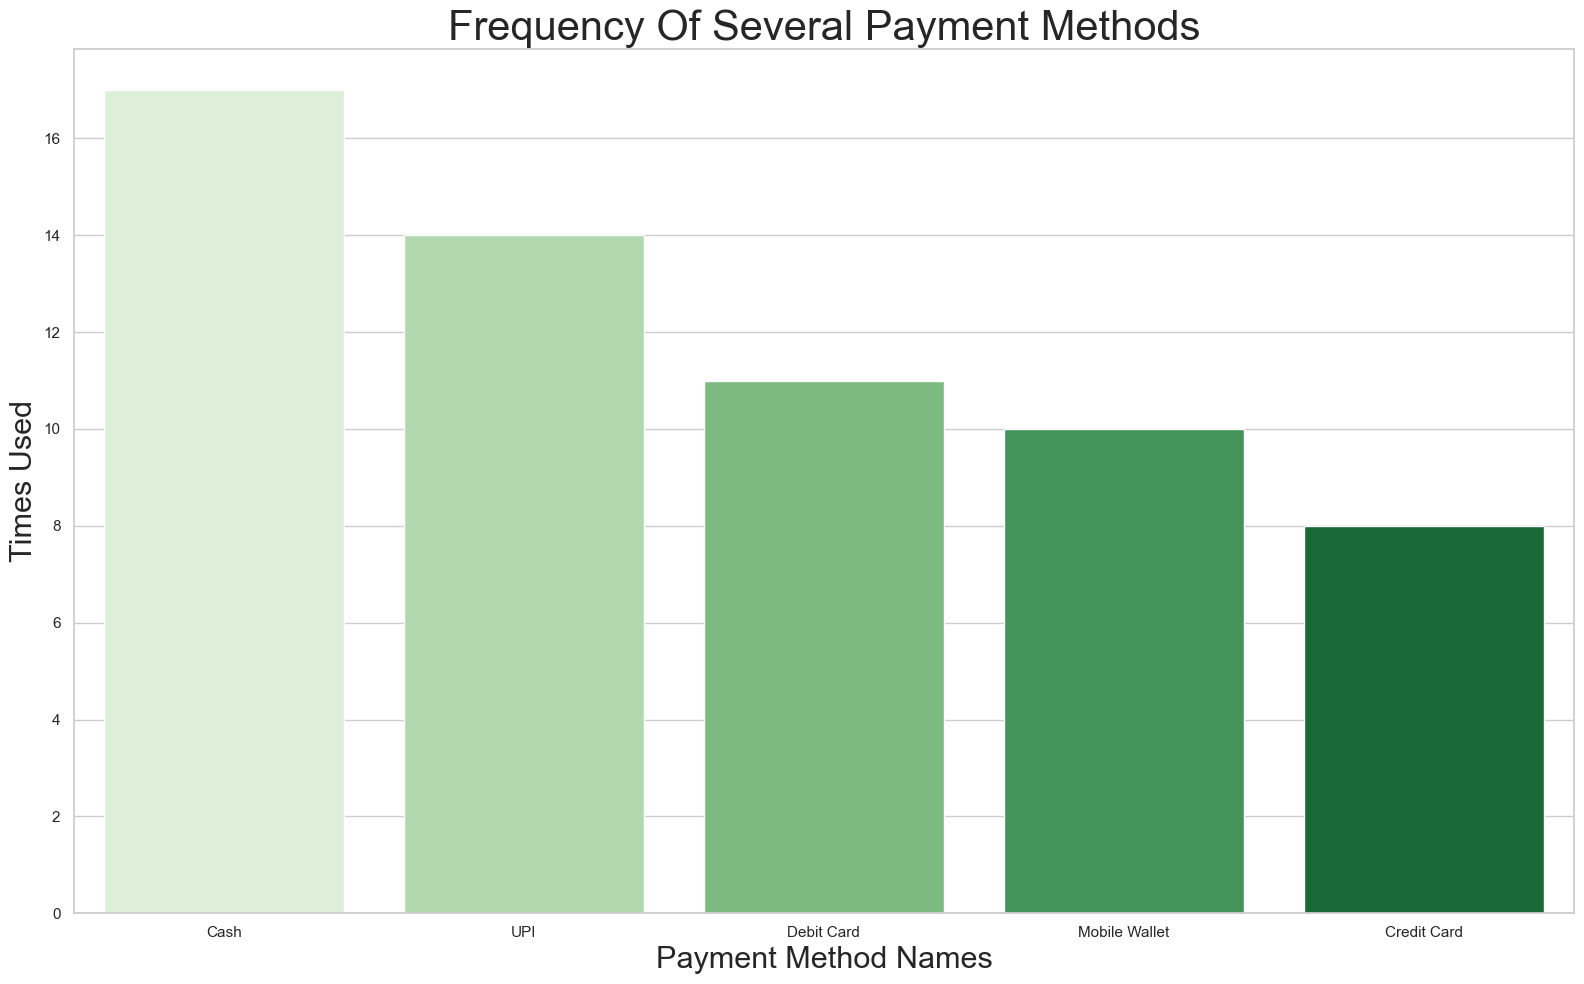

In [72]:
plt.figure(figsize=(16,10))
sns.set_theme(style="whitegrid",context="notebook")
sns.barplot(x="METHOD_NAME",y="TIMES_USED",hue="METHOD_NAME",data=df_payment,dodge=False,palette="Greens")
plt.title("Frequency Of Several Payment Methods",fontsize=30)
plt.xlabel("Payment Method Names",fontsize=22)
plt.ylabel("Times Used",fontsize=22)
plt.tight_layout()
plt.show()

# RUNNING PROCEDURE 10: PROC_CUSTOMER_FREQUENCY_TIER

In [75]:
cursor.callproc("PROC_CUSTOMER_FREQUENCY_TIER")
for result in cursor.stored_results():
    df_tier=pd.DataFrame(result.fetchall(),columns=[
        "CUSTOMER_ID","NAME","TOTAL_PURCHASES","FREQUENCY_TIER"
    ])
print("The frequency tier of the customers-")
pd.set_option("display.width",1000)
pd.set_option("display.max_columns",None)
print(df_tier)

The frequency tier of the customers-
    CUSTOMER_ID           NAME  TOTAL_PURCHASES FREQUENCY_TIER
0             1     Souvik Jha                1           RARE
1             2      Priya Das                4    OCCASSIONAL
2             3     Amit Verma                4    OCCASSIONAL
3             4      Sneha Roy                3    OCCASSIONAL
4             6   Anjali Mehta                1           RARE
5             7    Karan Singh                1           RARE
6             8    Neha Sharma                5    OCCASSIONAL
7             9      Manoj Das                3    OCCASSIONAL
8            10    Isha Kapoor                5    OCCASSIONAL
9            11   Vikram Rathi                1           RARE
10           13   Deepak Yadav                6       FREQUENT
11           14    Ritika Bose                5    OCCASSIONAL
12           15     Arjun Nair                3    OCCASSIONAL
13           16    Sana Sheikh                6       FREQUENT
14           17   

# PIE CHART TO SHOW THE DISTRIBUTION OF NUMBER OF CUSTOMERS IN EACH TIER

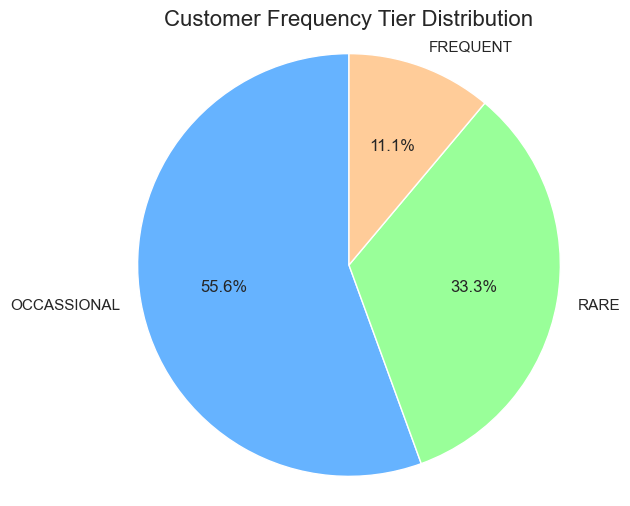

In [82]:
tier_counts = df_tier['FREQUENCY_TIER'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    tier_counts,
    labels=tier_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff','#99ff99','#ffcc99']
)
plt.title("Customer Frequency Tier Distribution", fontsize=16)
plt.axis('equal') 
plt.show()

# RUNNING PROCEDURE 11:PROC_PEAK_SALES_DAY

In [85]:
cursor.callproc("PROC_PEAK_SALES_DAY")
for result in cursor.stored_results():
    df_peak=pd.DataFrame(result.fetchall(),columns=[
        "DATE_ID","WEEKDAY","TOTAL_REVENUE"
    ])
pd.set_option("display.width",1000)
pd.set_option("display.max_columns",None)

print(df_peak)

       DATE_ID    WEEKDAY TOTAL_REVENUE
0   2025-06-01     Sunday     194994.00
1   2025-06-06     Friday      92294.00
2   2025-06-15     Sunday     379883.00
3   2025-06-09     Monday     184193.00
4   2025-06-12   Thursday     214992.00
5   2025-06-08     Sunday     104996.00
6   2025-06-05   Thursday      38496.00
7   2025-06-04  Wednesday     164890.00
8   2025-06-10    Tuesday     147590.00
9   2025-06-03    Tuesday      34996.00
10  2025-06-20     Friday     199488.00
11  2025-06-14   Saturday      73998.00
12  2025-06-18  Wednesday     141996.00
13  2025-06-11  Wednesday     139494.00
14  2025-06-16     Monday      48097.00
15  2025-06-07   Saturday      88296.00
16  2025-06-02     Monday     191493.00
17  2025-06-19   Thursday     180894.00


# RUNNING PROCEDURE 12:PROC_PRODUCT_SALES_TREND

In [92]:
product_id=109
cursor.callproc("PROC_PRODUCT_SALES_TREND",[product_id])
for result in cursor.stored_results():
    df_12=pd.DataFrame(result.fetchall(),columns=[
        "DATE_ID","PRODUCT_NAME","UNITS_SOLD","TOTAL_REVENUE"
    ])
pd.set_option("display.width",1000)
pd.set_option("display.max_columns",None)

print(df_12)

      DATE_ID        PRODUCT_NAME UNITS_SOLD TOTAL_REVENUE
0  2025-06-01  HP Pavilion Laptop          1      56999.00
1  2025-06-04  HP Pavilion Laptop          2     113998.00
2  2025-06-07  HP Pavilion Laptop          1      56999.00
3  2025-06-09  HP Pavilion Laptop          2     113998.00
4  2025-06-18  HP Pavilion Laptop          2     113998.00
5  2025-06-19  HP Pavilion Laptop          3     170997.00


# LINE PLOT FOR THE DATE WISE REVENUE GENERATION EACH DAY

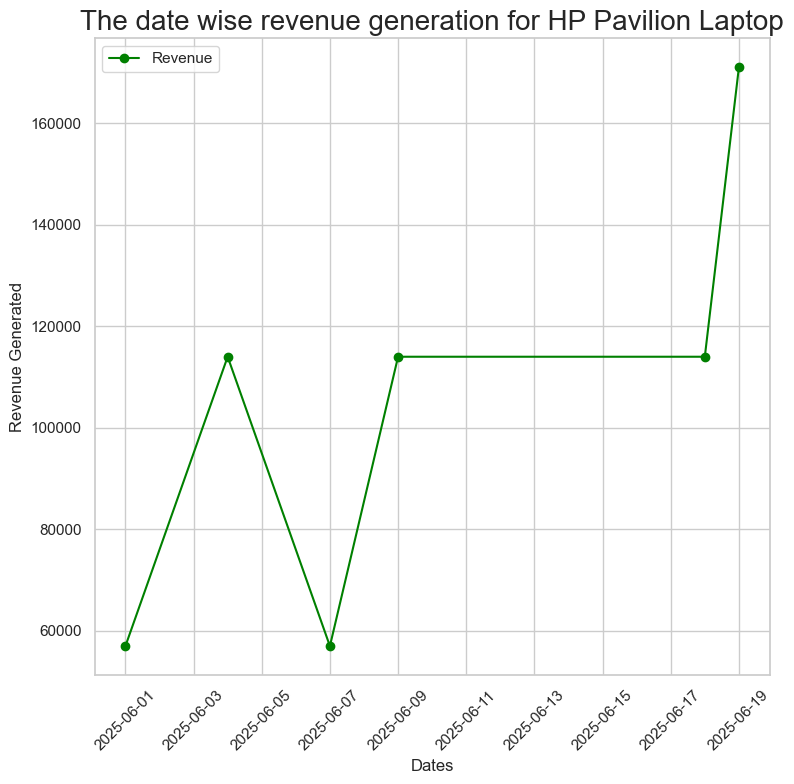

In [109]:
product_name=df_12["PRODUCT_NAME"].iloc[0]
plt.figure(figsize=(8,8))
plt.plot(df_12["DATE_ID"],df_12["TOTAL_REVENUE"],marker="o",color="green",label="Revenue")
plt.title(f"The date wise revenue generation for {product_name}",fontsize=20)
plt.xlabel("Dates",fontsize=12)
plt.ylabel("Revenue Generated",fontsize=12);
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# RUNNING PROCEDURE 13:PROC_STORE_PERFORMANCE_SUMMARY

In [114]:
cursor.callproc("PROC_STORE_PERFORMANCE_SUMMARY")
for result in cursor.stored_results():
    df_13=pd.DataFrame(result.fetchall(),columns=[
        "STORE_ID","STORE_NAME","TOTAL_UNITS_SOLD","TOTAL_TRANSACTIONS","TOTAL_REVENUE","AVERAGE_REVENUE_PER_TRANSACTION"
    ])
pd.set_option("display.width",1000)
pd.set_option("display.max_columns",None)

print(df_13)

   STORE_ID                   STORE_NAME TOTAL_UNITS_SOLD  TOTAL_TRANSACTIONS TOTAL_REVENUE AVERAGE_REVENUE_PER_TRANSACTION
0       201         Big Bazaar - Kolkata               12                   6     324488.00                    54081.333333
1       202     Reliance Digital - Delhi                4                   2      45296.00                    22648.000000
2       203               Croma - Mumbai                7                   3     199793.00                    66597.666667
3       204           D-Mart - Bangalore               19                   9     282181.00                    31353.444444
4       205               V-Mart - Patna               14                   6     216986.00                    36164.333333
5       206  Reliance Trends - Hyderabad                9                   5     180891.00                    36178.200000
6       207         More Retail - Jaipur                5                   3     145295.00                    48431.666667
7       

# LINE PLOT FOR STORE PERFORMANCES

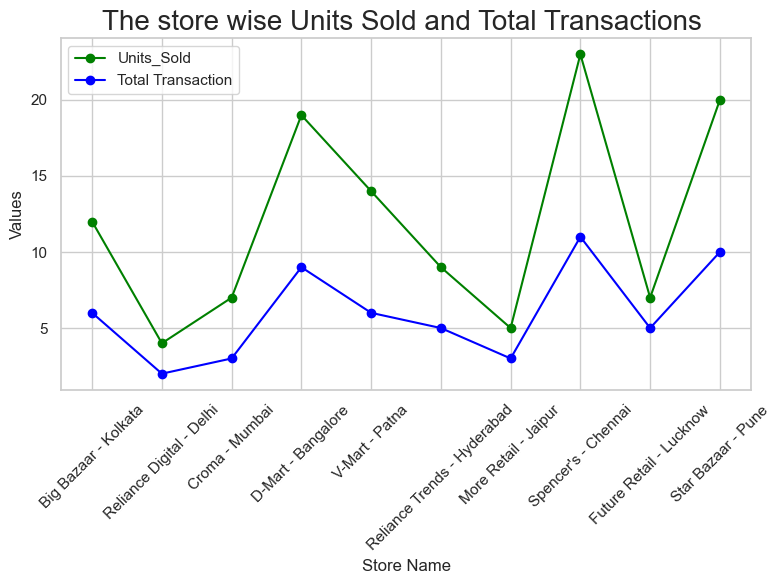

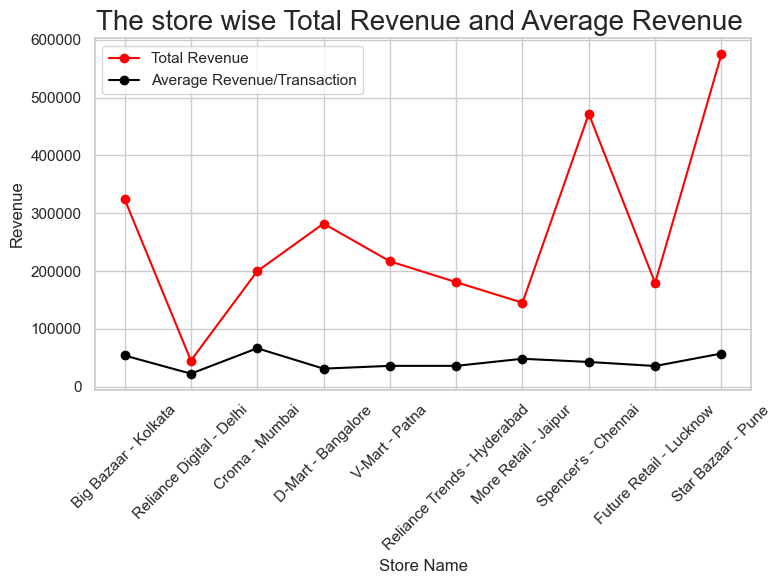

In [127]:
plt.figure(figsize=(8,6))
plt.plot(df_13["STORE_NAME"],df_13["TOTAL_UNITS_SOLD"],marker="o",color="green",label="Units_Sold")
plt.plot(df_13["STORE_NAME"],df_13["TOTAL_TRANSACTIONS"],marker="o",color="blue",label="Total Transaction")
plt.title("The store wise Units Sold and Total Transactions ",fontsize=20)
plt.xlabel("Store Name",fontsize=12)
plt.ylabel("Values",fontsize=12);
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(" ")
print(" ")
print(" ")


plt.figure(figsize=(8,6))
plt.plot(df_13["STORE_NAME"],df_13["TOTAL_REVENUE"],marker="o",color="red",label="Total Revenue")
plt.plot(df_13["STORE_NAME"],df_13["AVERAGE_REVENUE_PER_TRANSACTION"],marker="o",color="black",label="Average Revenue/Transaction")
plt.title("The store wise Total Revenue and Average Revenue ",fontsize=20)
plt.xlabel("Store Name",fontsize=12)
plt.ylabel("Revenue",fontsize=12);
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()